#### Import the libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Files

In [2]:
os.chdir('C:/Users/System Administrator/Desktop/CDS/Assignment_3')

#### Print the names file to know the variable (attributes) of the data set

 0. Date (DD/MM/YYYY)
 1. Time (HH.MM.SS)
 2. True hourly averaged concentration CO in mg/m^3 (reference analyzer)
 3. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
 4. True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
 5. True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
 6. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
 7. True hourly averaged NOx concentration in ppb (reference analyzer)
 8. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
 9. True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
 10. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
 11. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
 12. Temperature in Â°C
 13. Relative Humidity (%)
 14. AH Absolute Humidity

#### Read the data file

In [3]:
airquality = pd.read_csv('./airquality1.csv', sep = ',', index_col = 0)
airquality.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
3,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
4,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
5,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


### EDA

In [4]:
airquality.shape

(9357, 13)

In [5]:
# Missing value
airquality.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
airquality.dtypes

CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

#### Train Test split

In [7]:
y = airquality['T']
airquality.insert(0, 'constant', np.ones(airquality.shape[0]))
X = airquality.drop(['T'], axis = 1)

In [8]:
X.head()

,constant,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH
1,1.0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,48.9,0.7578
2,1.0,2.0,1292,112,9.4,955,103,1174,92,1559,972,47.7,0.7255
3,1.0,2.2,1402,88,9.0,939,131,1140,114,1555,1074,54.0,0.7502
4,1.0,2.2,1376,80,9.2,948,172,1092,122,1584,1203,60.0,0.7867
5,1.0,1.6,1272,51,6.5,836,131,1205,116,1490,1110,59.6,0.7888


In [9]:
y.head()

1    13.6
2    13.3
3    11.9
4    11.0
5    11.2
Name: T, dtype: float64

In [10]:
for column in X.columns[1:]:
    X[column] = (X[column] - X[column].mean()) / X[column].std() 
y = (y-np.mean(y))

In [11]:
X = np.array(X)
y = np.array(y)

In [24]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = False)
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (8421, 13)
y_train: (8421,)
X_test: (936, 13)
y_test: (936,)


> ### OLS

In [26]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.473e+05
Date:                Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:34:18   Log-Likelihood:                -21543.
No. Observations:                8421   AIC:                         4.311e+04
Df Residuals:                    8408   BIC:                         4.320e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0248      0.035      0.713      0.4

In [14]:
# Analytical result
w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
print(w)

[ 2.47787942e-02  1.05853525e-01 -9.06984398e-01 -1.11476435e+00
 -3.09288246e+01  1.13088589e+00  1.72930194e+00 -1.95543557e+00
 -1.47800172e+00  1.11949172e+01 -1.84266982e+00 -1.62444642e+01
  8.26555109e+01]


In [15]:
print(f'R_square value: {model.rsquared}')
print(f'Adj R_square value: {model.rsquared_adj}')
print(f'Testing accuracy: {r2_score(model.predict(X_test), y_test)}')

R_square value: 0.9952669998299652
Adj R_square value: 0.99526024483448
Testing accuracy: 0.89340427585182


In [16]:
class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))

X_train:(8421, 13)
y_train:(8421,)
Iteration: 0, Cost: 1037.742
Iteration: 1, Cost: 930.716
Iteration: 2, Cost: 836.165
Iteration: 3, Cost: 752.597
Iteration: 4, Cost: 678.701
Iteration: 5, Cost: 613.323
Iteration: 6, Cost: 555.449
Iteration: 7, Cost: 504.187
Iteration: 8, Cost: 458.752
Iteration: 9, Cost: 418.453
Iteration: 10, Cost: 382.684
Iteration: 11, Cost: 350.909
Iteration: 12, Cost: 322.659
Iteration: 13, Cost: 297.519
Iteration: 14, Cost: 275.125
Iteration: 15, Cost: 255.156
Iteration: 16, Cost: 237.330
Iteration: 17, Cost: 221.398
Iteration: 18, Cost: 207.141
Iteration: 19, Cost: 194.366
Iteration: 20, Cost: 182.903
Iteration: 21, Cost: 172.602
Iteration: 22, Cost: 163.331
Iteration: 23, Cost: 154.974
Iteration: 24, Cost: 147.427
Iteration: 25, Cost: 140.601
Iteration: 26, Cost: 134.414
Iteration: 27, Cost: 128.797
Iteration: 28, Cost: 123.687
Iteration: 29, Cost: 119.029
Iteration: 30, Cost: 114.774
Iteration: 31, Cost: 110.879
Iteration: 32, Cost: 107.307
Iteration: 33, Co

Iteration: 840, Cost: 21.750
Iteration: 841, Cost: 21.738
Iteration: 842, Cost: 21.727
Iteration: 843, Cost: 21.716
Iteration: 844, Cost: 21.704
Iteration: 845, Cost: 21.693
Iteration: 846, Cost: 21.682
Iteration: 847, Cost: 21.671
Iteration: 848, Cost: 21.659
Iteration: 849, Cost: 21.648
Iteration: 850, Cost: 21.637
Iteration: 851, Cost: 21.626
Iteration: 852, Cost: 21.615
Iteration: 853, Cost: 21.604
Iteration: 854, Cost: 21.593
Iteration: 855, Cost: 21.581
Iteration: 856, Cost: 21.570
Iteration: 857, Cost: 21.559
Iteration: 858, Cost: 21.548
Iteration: 859, Cost: 21.537
Iteration: 860, Cost: 21.526
Iteration: 861, Cost: 21.515
Iteration: 862, Cost: 21.504
Iteration: 863, Cost: 21.493
Iteration: 864, Cost: 21.482
Iteration: 865, Cost: 21.471
Iteration: 866, Cost: 21.460
Iteration: 867, Cost: 21.449
Iteration: 868, Cost: 21.439
Iteration: 869, Cost: 21.428
Iteration: 870, Cost: 21.417
Iteration: 871, Cost: 21.406
Iteration: 872, Cost: 21.395
Iteration: 873, Cost: 21.384
Iteration: 874

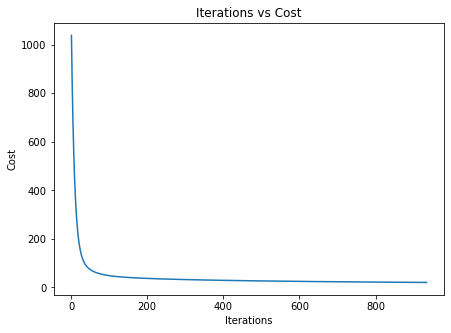

In [17]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=False)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(8421, 13)
y_train:(8421,)
Iteration: 0, Cost: 840.429
Iteration: 1, Cost: 756.443
Iteration: 2, Cost: 681.982
Iteration: 3, Cost: 615.942
Iteration: 4, Cost: 557.346
Iteration: 5, Cost: 505.333
Iteration: 6, Cost: 459.142
Iteration: 7, Cost: 418.100
Iteration: 8, Cost: 381.615
Iteration: 9, Cost: 349.160
Iteration: 10, Cost: 320.274
Iteration: 11, Cost: 294.547
Iteration: 12, Cost: 271.618
Iteration: 13, Cost: 251.167
Iteration: 14, Cost: 232.911
Iteration: 15, Cost: 216.601
Iteration: 16, Cost: 202.017
Iteration: 17, Cost: 188.963
Iteration: 18, Cost: 177.267
Iteration: 19, Cost: 166.777
Iteration: 20, Cost: 157.357
Iteration: 21, Cost: 148.888
Iteration: 22, Cost: 141.264
Iteration: 23, Cost: 134.393
Iteration: 24, Cost: 128.190
Iteration: 25, Cost: 122.583
Iteration: 26, Cost: 117.508
Iteration: 27, Cost: 112.905
Iteration: 28, Cost: 108.725
Iteration: 29, Cost: 104.923
Iteration: 30, Cost: 101.457
Iteration: 31, Cost: 98.293
Iteration: 32, Cost: 95.399
Iteration: 33, Cost:

Iteration: 285, Cost: 36.321
Iteration: 286, Cost: 36.277
Iteration: 287, Cost: 36.234
Iteration: 288, Cost: 36.191
Iteration: 289, Cost: 36.148
Iteration: 290, Cost: 36.105
Iteration: 291, Cost: 36.062
Iteration: 292, Cost: 36.019
Iteration: 293, Cost: 35.977
Iteration: 294, Cost: 35.935
Iteration: 295, Cost: 35.892
Iteration: 296, Cost: 35.850
Iteration: 297, Cost: 35.809
Iteration: 298, Cost: 35.767
Iteration: 299, Cost: 35.725
Iteration: 300, Cost: 35.684
Iteration: 301, Cost: 35.642
Iteration: 302, Cost: 35.601
Iteration: 303, Cost: 35.560
Iteration: 304, Cost: 35.519
Iteration: 305, Cost: 35.478
Iteration: 306, Cost: 35.438
Iteration: 307, Cost: 35.397
Iteration: 308, Cost: 35.357
Iteration: 309, Cost: 35.317
Iteration: 310, Cost: 35.276
Iteration: 311, Cost: 35.236
Iteration: 312, Cost: 35.197
Iteration: 313, Cost: 35.157
Iteration: 314, Cost: 35.117
Iteration: 315, Cost: 35.078
Iteration: 316, Cost: 35.038
Iteration: 317, Cost: 34.999
Iteration: 318, Cost: 34.960
Iteration: 319

Iteration: 569, Cost: 27.887
Iteration: 570, Cost: 27.866
Iteration: 571, Cost: 27.846
Iteration: 572, Cost: 27.825
Iteration: 573, Cost: 27.805
Iteration: 574, Cost: 27.784
Iteration: 575, Cost: 27.764
Iteration: 576, Cost: 27.744
Iteration: 577, Cost: 27.723
Iteration: 578, Cost: 27.703
Iteration: 579, Cost: 27.683
Iteration: 580, Cost: 27.663
Iteration: 581, Cost: 27.643
Iteration: 582, Cost: 27.623
Iteration: 583, Cost: 27.603
Iteration: 584, Cost: 27.583
Iteration: 585, Cost: 27.563
Iteration: 586, Cost: 27.543
Iteration: 587, Cost: 27.523
Iteration: 588, Cost: 27.503
Iteration: 589, Cost: 27.483
Iteration: 590, Cost: 27.464
Iteration: 591, Cost: 27.444
Iteration: 592, Cost: 27.424
Iteration: 593, Cost: 27.404
Iteration: 594, Cost: 27.385
Iteration: 595, Cost: 27.365
Iteration: 596, Cost: 27.346
Iteration: 597, Cost: 27.326
Iteration: 598, Cost: 27.307
Iteration: 599, Cost: 27.287
Iteration: 600, Cost: 27.268
Iteration: 601, Cost: 27.249
Iteration: 602, Cost: 27.229
Iteration: 603

Iteration: 853, Cost: 23.315
Iteration: 854, Cost: 23.302
Iteration: 855, Cost: 23.290
Iteration: 856, Cost: 23.277
Iteration: 857, Cost: 23.264
Iteration: 858, Cost: 23.252
Iteration: 859, Cost: 23.239
Iteration: 860, Cost: 23.226
Iteration: 861, Cost: 23.214
Iteration: 862, Cost: 23.201
Iteration: 863, Cost: 23.189
Iteration: 864, Cost: 23.176
Iteration: 865, Cost: 23.163
Iteration: 866, Cost: 23.151
Iteration: 867, Cost: 23.138
Iteration: 868, Cost: 23.126
Iteration: 869, Cost: 23.114
Iteration: 870, Cost: 23.101
Iteration: 871, Cost: 23.089
Iteration: 872, Cost: 23.076
Iteration: 873, Cost: 23.064
Iteration: 874, Cost: 23.051
Iteration: 875, Cost: 23.039
Iteration: 876, Cost: 23.027
Iteration: 877, Cost: 23.014
Iteration: 878, Cost: 23.002
Iteration: 879, Cost: 22.990
Iteration: 880, Cost: 22.978
Iteration: 881, Cost: 22.965
Iteration: 882, Cost: 22.953
Iteration: 883, Cost: 22.941
Iteration: 884, Cost: 22.929
Iteration: 885, Cost: 22.917
Iteration: 886, Cost: 22.904
Iteration: 887

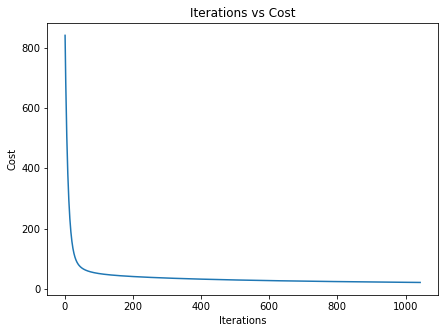

<Figure size 432x288 with 0 Axes>

In [22]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=False)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

In [19]:
observed = y_test
predicted = seq_regressor.predict(X_test)
residual = observed - predicted

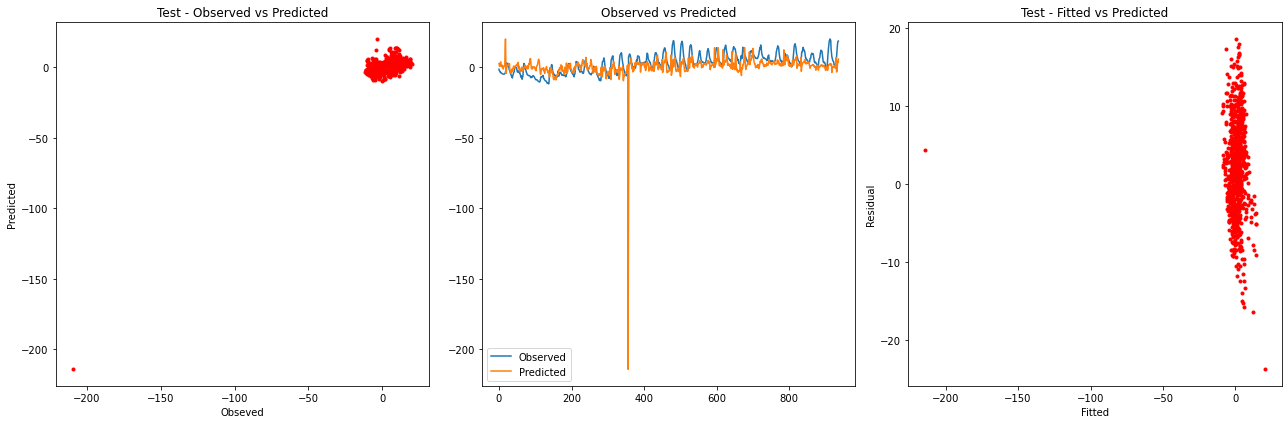

In [21]:
plt.subplots(figsize=(18, 6))
plt.subplot(1,3,1)
plt.plot(observed, predicted, 'r.')
plt.xlabel('Obseved'); plt.ylabel('Predicted')
plt.title('Test - Observed vs Predicted')
plt.subplot(1,3,2)
plt.plot(observed, label = 'Observed')
plt.plot(predicted, label = 'Predicted')
plt.title('Observed vs Predicted')
plt.legend(loc = 'best')
plt.subplot(1,3,3)
plt.plot(predicted, residual, 'r.')
plt.xlabel('Fitted'); plt.ylabel('Residual')
plt.title('Test - Fitted vs Predicted')
plt.tight_layout()
plt.savefig('./fig3.png')